## Time Series Forecasting Using ARIMA and Prophet

### Objective

1. Perform time series forecasting using ARIMA and Prophet models.
2. Compare the performance of the two models.
3. Understand the steps involved in preprocessing, model building, and evaluation.

In [ ]:
# pip install prophet

In [21]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### 1. Import Required Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error

### 2. Load and Explore the Dataset

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


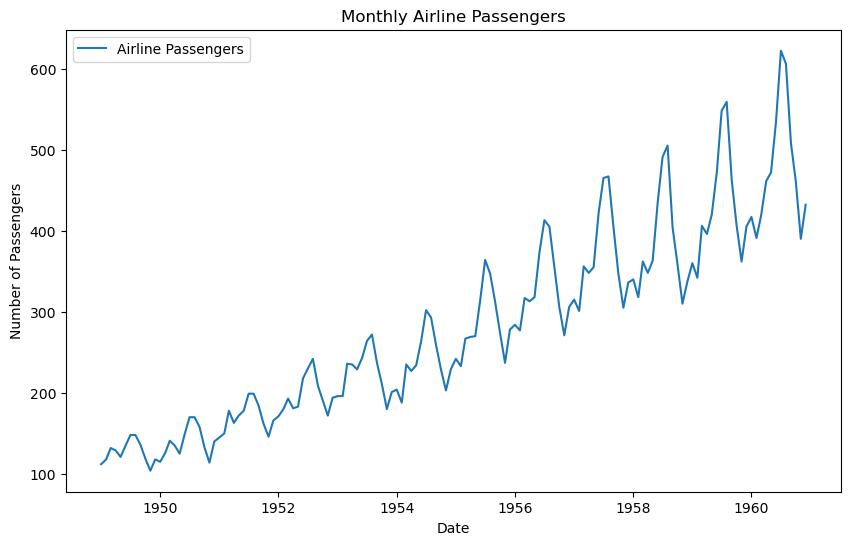

In [25]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

# Display first few rows
print(data.head())

# Rename columns for Prophet compatibility
data.columns = ['ds', 'y']

# Convert 'ds' column to datetime
data['ds'] = pd.to_datetime(data['ds'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Airline Passengers')
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

### 3. Preprocessing for ARIMA

ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411


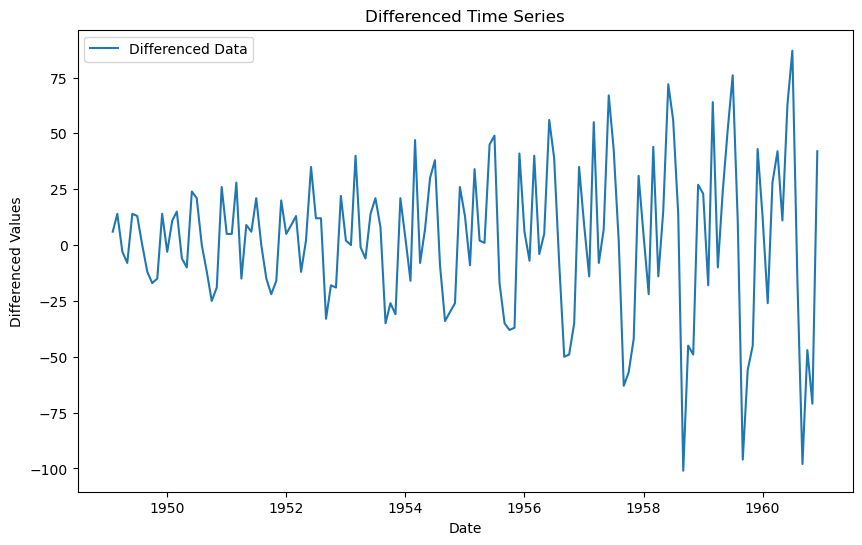

In [27]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity
result = adfuller(data['y'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Create a differenced column
data['y_diff'] = data['y'].diff()

# Drop the first row where the differenced value is NaN
differenced_data = data.dropna(subset=['y_diff'])

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(differenced_data['ds'], differenced_data['y_diff'], label='Differenced Data')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Values')
plt.legend()
plt.show()

### 4. Forecasting with ARIMA

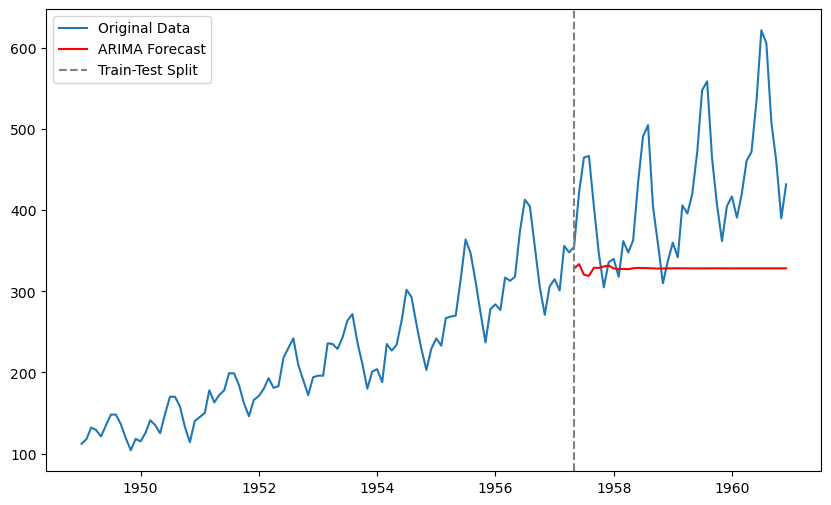

ARIMA RMSE: 120.47861556805833


In [29]:
# Split data into training and testing sets
train = data['y'][:100]  # First 100 data points for training
test = data['y'][100:]   # Remaining data points for testing

# Build and fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Example order (p, d, q)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Original Data')
plt.plot(data['ds'][100:], forecast, label='ARIMA Forecast', color='red')
plt.axvline(x=data['ds'][100], color='gray', linestyle='--', label='Train-Test Split')
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"ARIMA RMSE: {rmse}")

### 5. Forecasting with Prophet

15:48:38 - cmdstanpy - INFO - Chain [1] start processing
15:48:39 - cmdstanpy - INFO - Chain [1] done processing


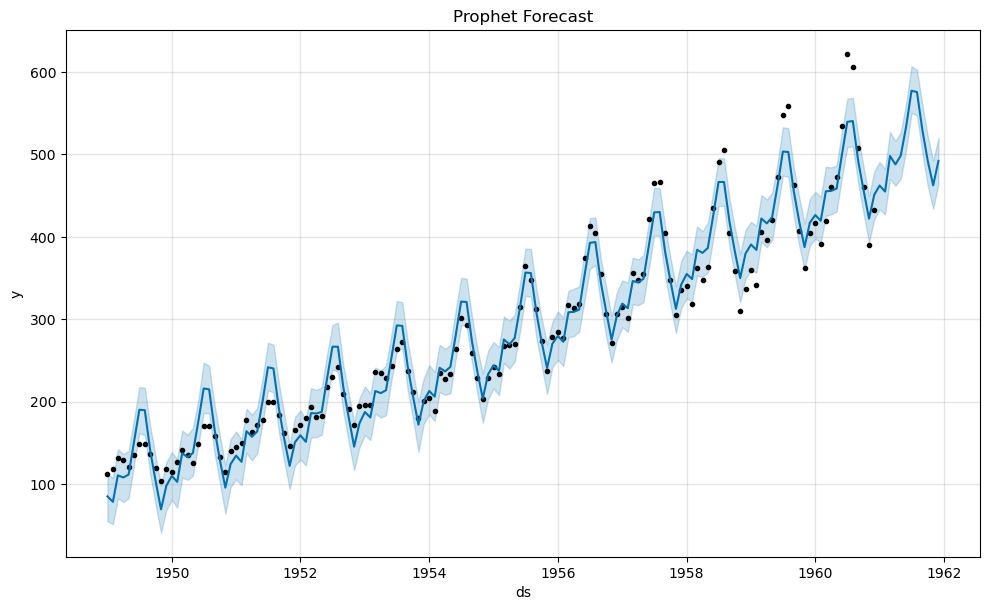

Prophet RMSE: 47.69804775349914


In [31]:
# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Create a future dataframe
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()

# Calculate RMSE on test data
prophet_forecast = forecast.iloc[-len(test):]['yhat'].values
rmse_prophet = np.sqrt(mean_squared_error(test, prophet_forecast))
print(f"Prophet RMSE: {rmse_prophet}")

### 6. Compare Results

In [33]:
print(f"ARIMA RMSE: {rmse}")
print(f"Prophet RMSE: {rmse_prophet}")

if rmse < rmse_prophet:
    print("ARIMA performed better.")
else:
    print("Prophet performed better.")

ARIMA RMSE: 120.47861556805833
Prophet RMSE: 47.69804775349914
Prophet performed better.
